## In this Notebook the basic results of "An Artificial Neuron Implemented on an Actual Quantum Processor", arXiv: 1811.0226v1 are reproduced.

In [1]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# See a list of available local simulators
print("Aer backends: ", Aer.backends())

Aer backends:  [<QasmSimulator('qasm_simulator') from AerProvider()>, <StatevectorSimulator('statevector_simulator') from AerProvider()>, <UnitarySimulator('unitary_simulator') from AerProvider()>]


In the paper two approaches are discussed to implement the perceptron: a straight-forward approach and a more elaborate approach that needs fewer gates.

## Straight-forward approach 

In [20]:
## N=2

n_0=[0,1]
n_1=[0,1]
n_2=[0,1]
n_3=[0,1]

m_0=[0,1]
m_1=[0,1]
m_2=[0,1]
m_3=[0,1]

l=(0,0)
dicti={l:0}
dicti_t={l:0}


for j_0 in n_0:
    for j_1 in n_1:
        for j_2 in n_2:
            for j_3 in n_3:
                for v_0 in m_0:
                    for v_1 in m_1:
                        for v_2 in m_2:
                            for v_3 in m_3:
                                qr = QuantumRegister(3)
                                cr = ClassicalRegister(1)
                                circuit=QuantumCircuit(qr, cr)
                                circuit.h(qr[0]);
                                circuit.h(qr[1]);
                                i_0=(-1)**(j_0)
                                i_1=(-1)**(j_1)
                                i_2=(-1)**(j_2)
                                i_3=(-1)**(j_3)
                                w_0=(-1)**(v_0)
                                w_1=(-1)**(v_1)
                                w_2=(-1)**(v_2)
                                w_3=(-1)**(v_3)
                                
                                if i_0 == -1:
                                    circuit.x(qr[0]);
                                    circuit.x(qr[1]);
                                    circuit.cz(qr[0], qr[1]);
                                    circuit.x(qr[0]);
                                    circuit.x(qr[1]);
                                if i_1 == -1:
                                    circuit.x(qr[1]);
                                    circuit.cz(qr[0], qr[1]);
                                    circuit.x(qr[1]);    
                                if i_2 == -1:
                                    circuit.x(qr[0]);
                                    circuit.cz(qr[0], qr[1])
                                    circuit.x(qr[0]);
                                if i_3 == -1:
                                    circuit.cz(qr[0], qr[1])
                                if w_0 == -1:
                                    circuit.x(qr[0]);
                                    circuit.x(qr[1]);
                                    circuit.cz(qr[0], qr[1]);
                                    circuit.x(qr[0]);
                                    circuit.x(qr[1]);
                                if w_1 ==-1:
                                    circuit.x(qr[1]);
                                    circuit.cz(qr[0], qr[1]);
                                    circuit.x(qr[1]);    
                                if w_2 == -1:
                                    circuit.x(qr[0]);
                                    circuit.cz(qr[0], qr[1])
                                    circuit.x(qr[0]);
                                if w_3 == -1:
                                    circuit.cz(qr[0], qr[1])
                                        
                                    
                                circuit.h(qr[0]);
                                circuit.h(qr[1]);
                                circuit.x(qr[0]);
                                circuit.x(qr[1]);
                                circuit.ccx(qr[0],qr[1],qr[2])
                                circuit.measure(qr[2], cr[0]);
                                backend_sim = Aer.get_backend('qasm_simulator')
                                job_sim = execute(circuit, backend_sim)
                                result_sim = job_sim.result()
                                result_counts = result_sim.get_counts(circuit)    
                                # Print the results
                                #print(result_counts)
                                #show_results(result_counts)
                                #l=(j_0,j_1,j_2,j_3,v_0,v_1,v_2,v_3)
                                k_i=j_0*8+j_1*4+j_2*2+j_3
                                k_w=v_0*8+v_1*4+v_2*2+v_3
                                l=(k_i,k_w)
                                res_1=result_counts.get('1')
                                if res_1==None:
                                    res_1=0
                                dicti[l]=res_1
                                res_0=result_counts.get('0')
                                if res_0==None:
                                    res_0=0
                                dicti[l]=res_1/(res_0+res_1)
                                dicti_t[l]=res_0/(res_0+res_1)

                                



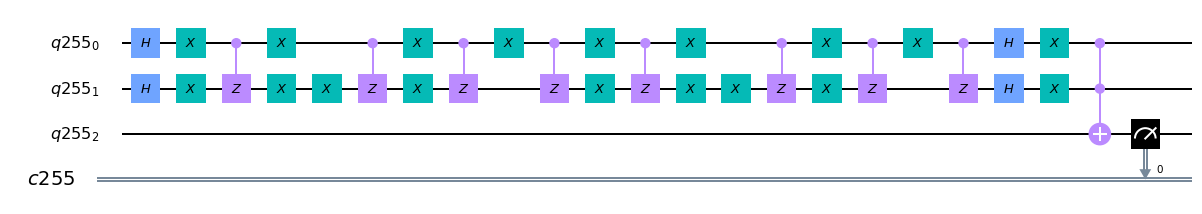

In [4]:
circuit.draw(output='mpl')

In [5]:
x=[]
y=[]
z=[]
for key in dicti:
    x.append(key[0])
    y.append(key[1])
    z.append(dicti[key])
x=np.array(x)
y=np.array(y)
z=np.array(z)


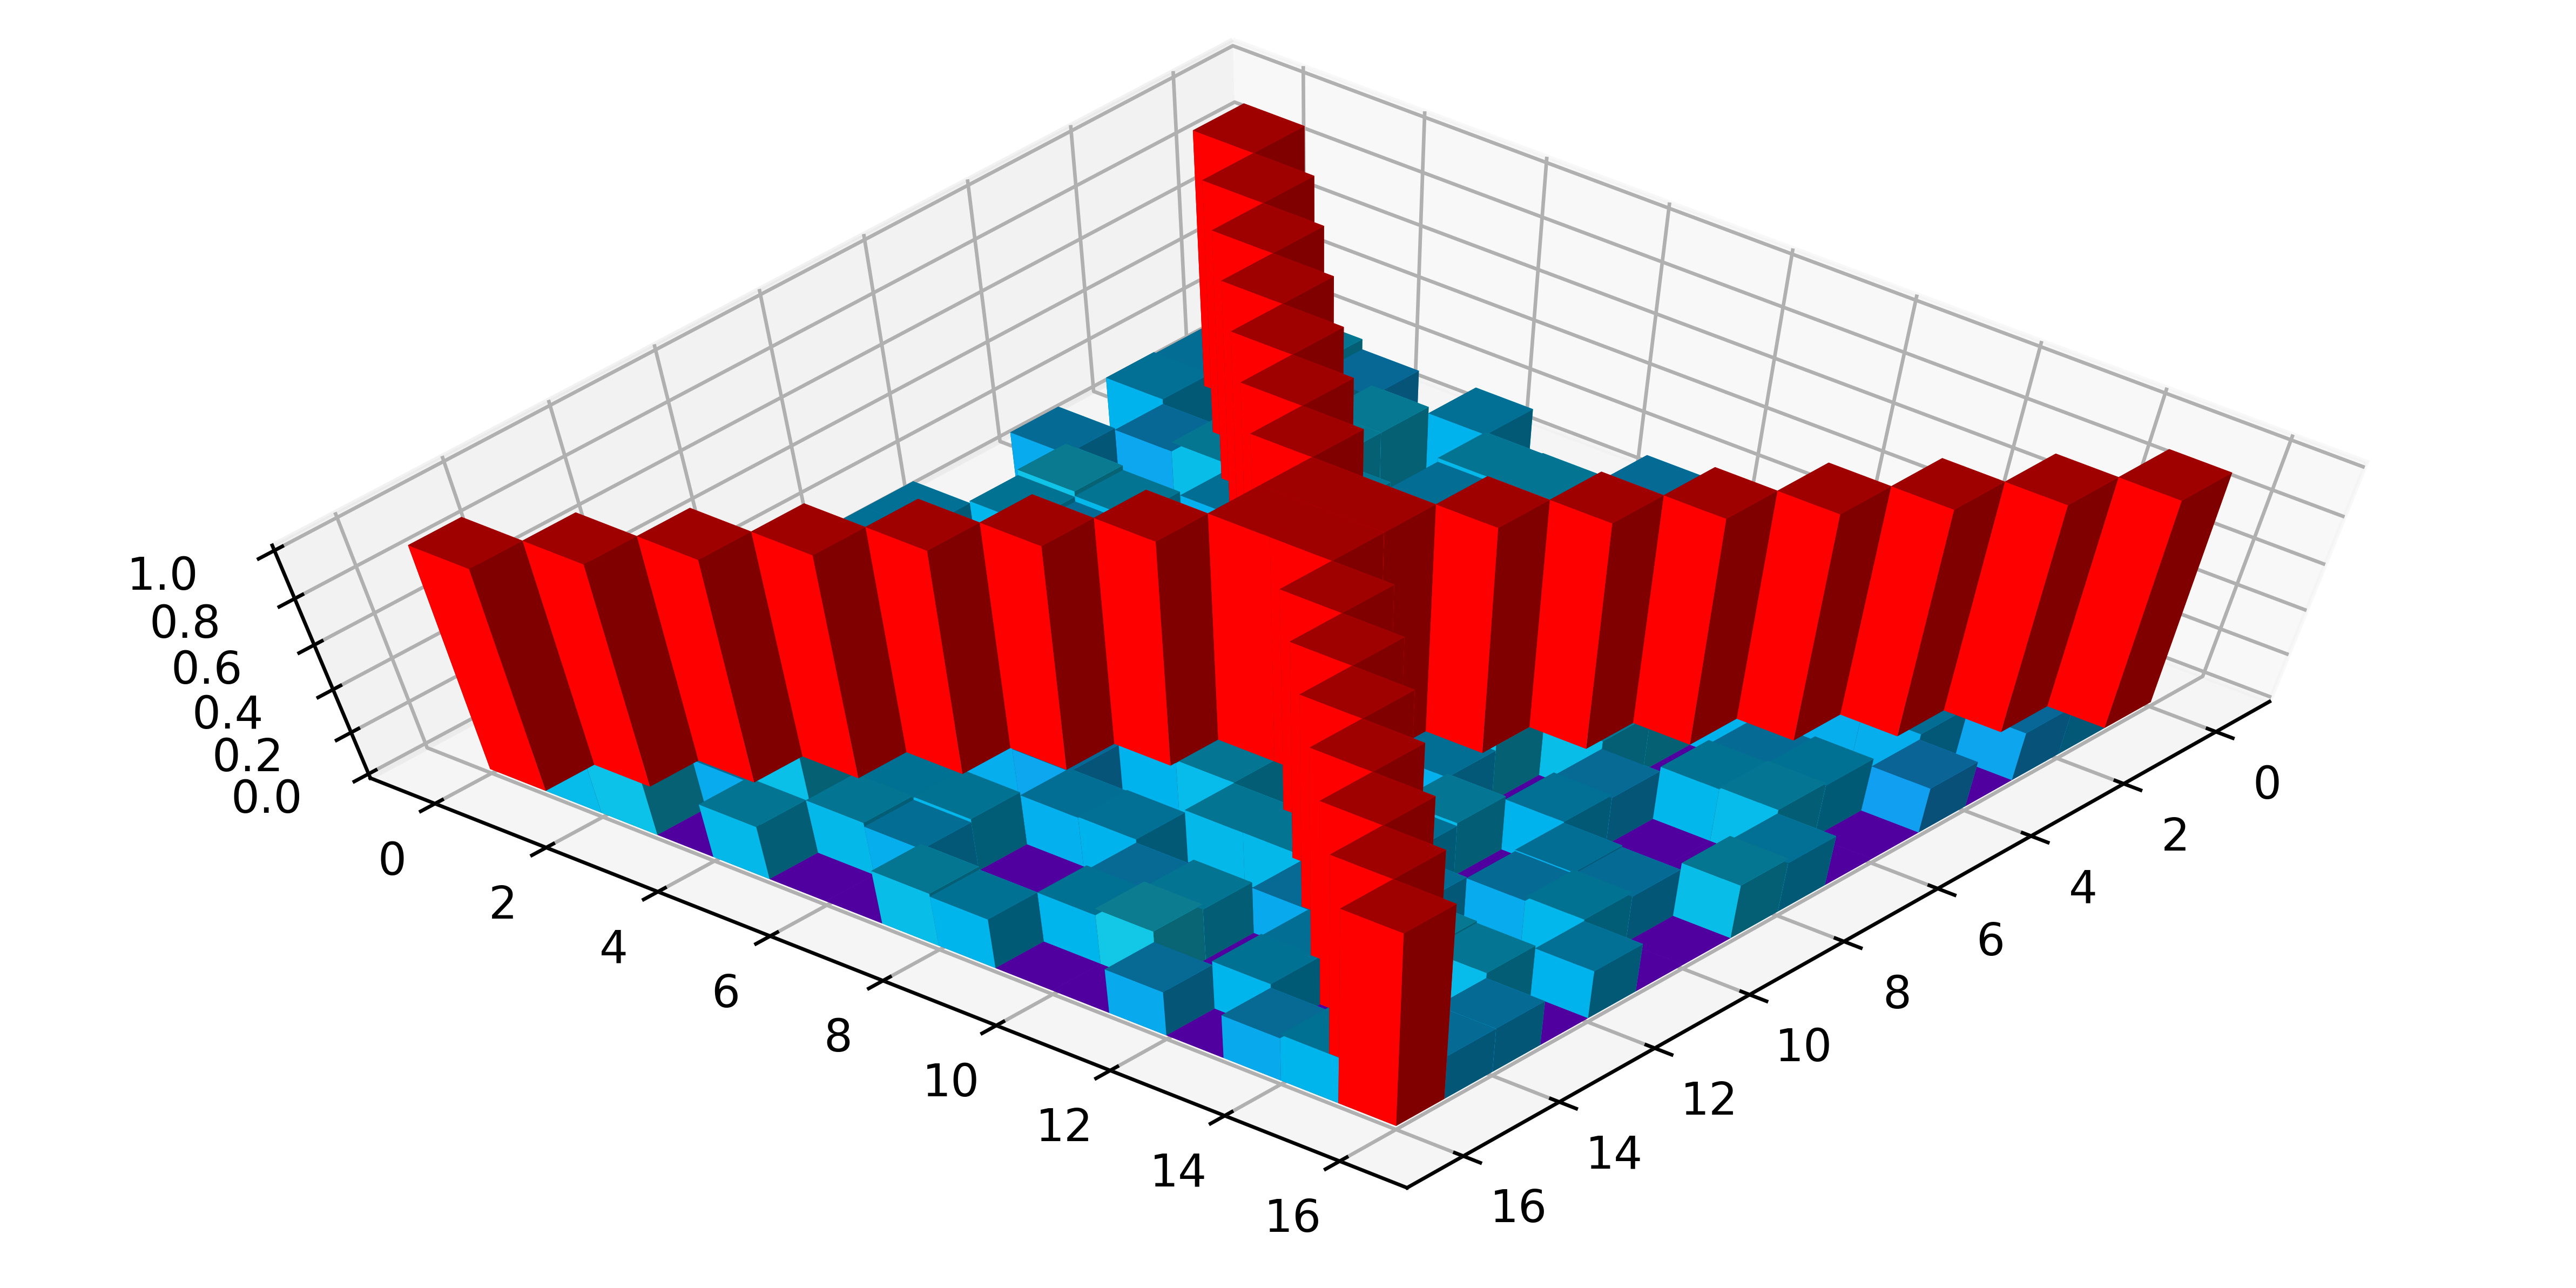

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import interactive
interactive(True)

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.cm as cm   



cmap = cm.get_cmap('rainbow')
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z] 

# setup the figure and axes
fig = plt.figure(figsize=(10, 5),dpi=600)
ax1 = fig.add_subplot(111, projection='3d')

bottom = np.zeros_like(z)
width = depth = 1

ax1.view_init(azim=40,elev=70)
ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)



## Elaborate approach

In [4]:
n_0=[0,1]
n_1=[0,1]
n_2=[0,1]
n_3=[0,1]

m_0=[0,1]
m_1=[0,1]
m_2=[0,1]
m_3=[0,1]

l=(0,0)
dicti2={l:0}
dicti2_t={l:0}


for j_0 in n_0:
    for j_1 in n_1:
        for j_2 in n_2:
            for j_3 in n_3:
                for v_0 in m_0:
                    for v_1 in m_1:
                        for v_2 in m_2:
                            for v_3 in m_3:
                                qr = QuantumRegister(3)
                                cr = ClassicalRegister(1)
                                circuit=QuantumCircuit(qr, cr)
                                circuit.h(qr[0]);
                                circuit.h(qr[1]);
                                i_0=(-1)**(j_0)
                                i_1=(-1)**(j_1)
                                i_2=(-1)**(j_2)
                                i_3=(-1)**(j_3)
                                w_0=(-1)**(v_0)
                                w_1=(-1)**(v_1)
                                w_2=(-1)**(v_2)
                                w_3=(-1)**(v_3)
                                
                                if i_0 == -1:
                                    i_1=-i_1
                                    i_2=-i_2
                                    i_3=-i_3
                                
                                if i_1 == -1:
                                    circuit.z(qr[1]);  
                                if i_2 == -1:
                                    circuit.z(qr[0]);
                                    
                                if i_3== 1 and i_2==-1:
                                    if i_1==1:
                                        circuit.cz(qr[0], qr[1])
                                if i_3== 1 and i_1==-1:
                                    if i_2==1:
                                        circuit.cz(qr[0], qr[1])       
                                if i_3 == -1 and (i_2==-1 and i_1==-1):
                                    circuit.cz(qr[0], qr[1])     
                                if i_3== -1 and (i_2==1 and i_1==1):
                                    circuit.cz(qr[0], qr[1])
                                
                                if w_0 == -1:
                                    w_1=-w_1
                                    w_2=-w_2
                                    w_3=-w_3
                                
                                if w_1 ==-1:
                                    circuit.z(qr[1]); 
                                if w_2 == -1:
                                    circuit.z(qr[0]); 
                                
                                
                                if w_3== 1 and w_2==-1:
                                    if w_1==1:
                                        circuit.cz(qr[0], qr[1])
                                if w_3== 1 and w_1==-1:
                                    if w_2==1:
                                        circuit.cz(qr[0], qr[1])       
                                if w_3 == -1 and (w_2==-1 and w_1==-1):
                                    circuit.cz(qr[0], qr[1])     
                                if w_3== -1 and (w_2==1 and w_1==1):
                                    circuit.cz(qr[0], qr[1])
                                            
                                circuit.h(qr[0]);
                                circuit.h(qr[1]);
                                circuit.x(qr[0]);
                                circuit.x(qr[1]);
                                circuit.ccx(qr[0],qr[1],qr[2])
                                circuit.measure(qr[2], cr[0]);
#                                execute_locally(circuit,draw_circuit=False)
                                backend_sim = Aer.get_backend('qasm_simulator')
                                job_sim = execute(circuit, backend_sim)
                                result_sim = job_sim.result()
                                result_counts = result_sim.get_counts(circuit)    
                                # Print the results
                                #print(result_counts)
                                #show_results(result_counts)
                                #l=(j_0,j_1,j_2,j_3,v_0,v_1,v_2,v_3)
                                k_i=j_0*8+j_1*4+j_2*2+j_3
                                k_w=v_0*8+v_1*4+v_2*2+v_3
                                l=(k_i,k_w)
                                res_1=result_counts.get('1')
                                if res_1==None:
                                    res_1=0
                                dicti2[l]=res_1
                                res_0=result_counts.get('0')
                                if res_0==None:
                                    res_0=0
                                dicti2[l]=res_1/(res_0+res_1)
                                dicti2_t[l]=res_0/(res_0+res_1)

                                


In [5]:
x=[]
y=[]
z=[]
for key in dicti2:
    x.append(key[0])
    y.append(key[1])
    z.append(dicti2[key])
x=np.array(x)
y=np.array(y)
z=np.array(z)


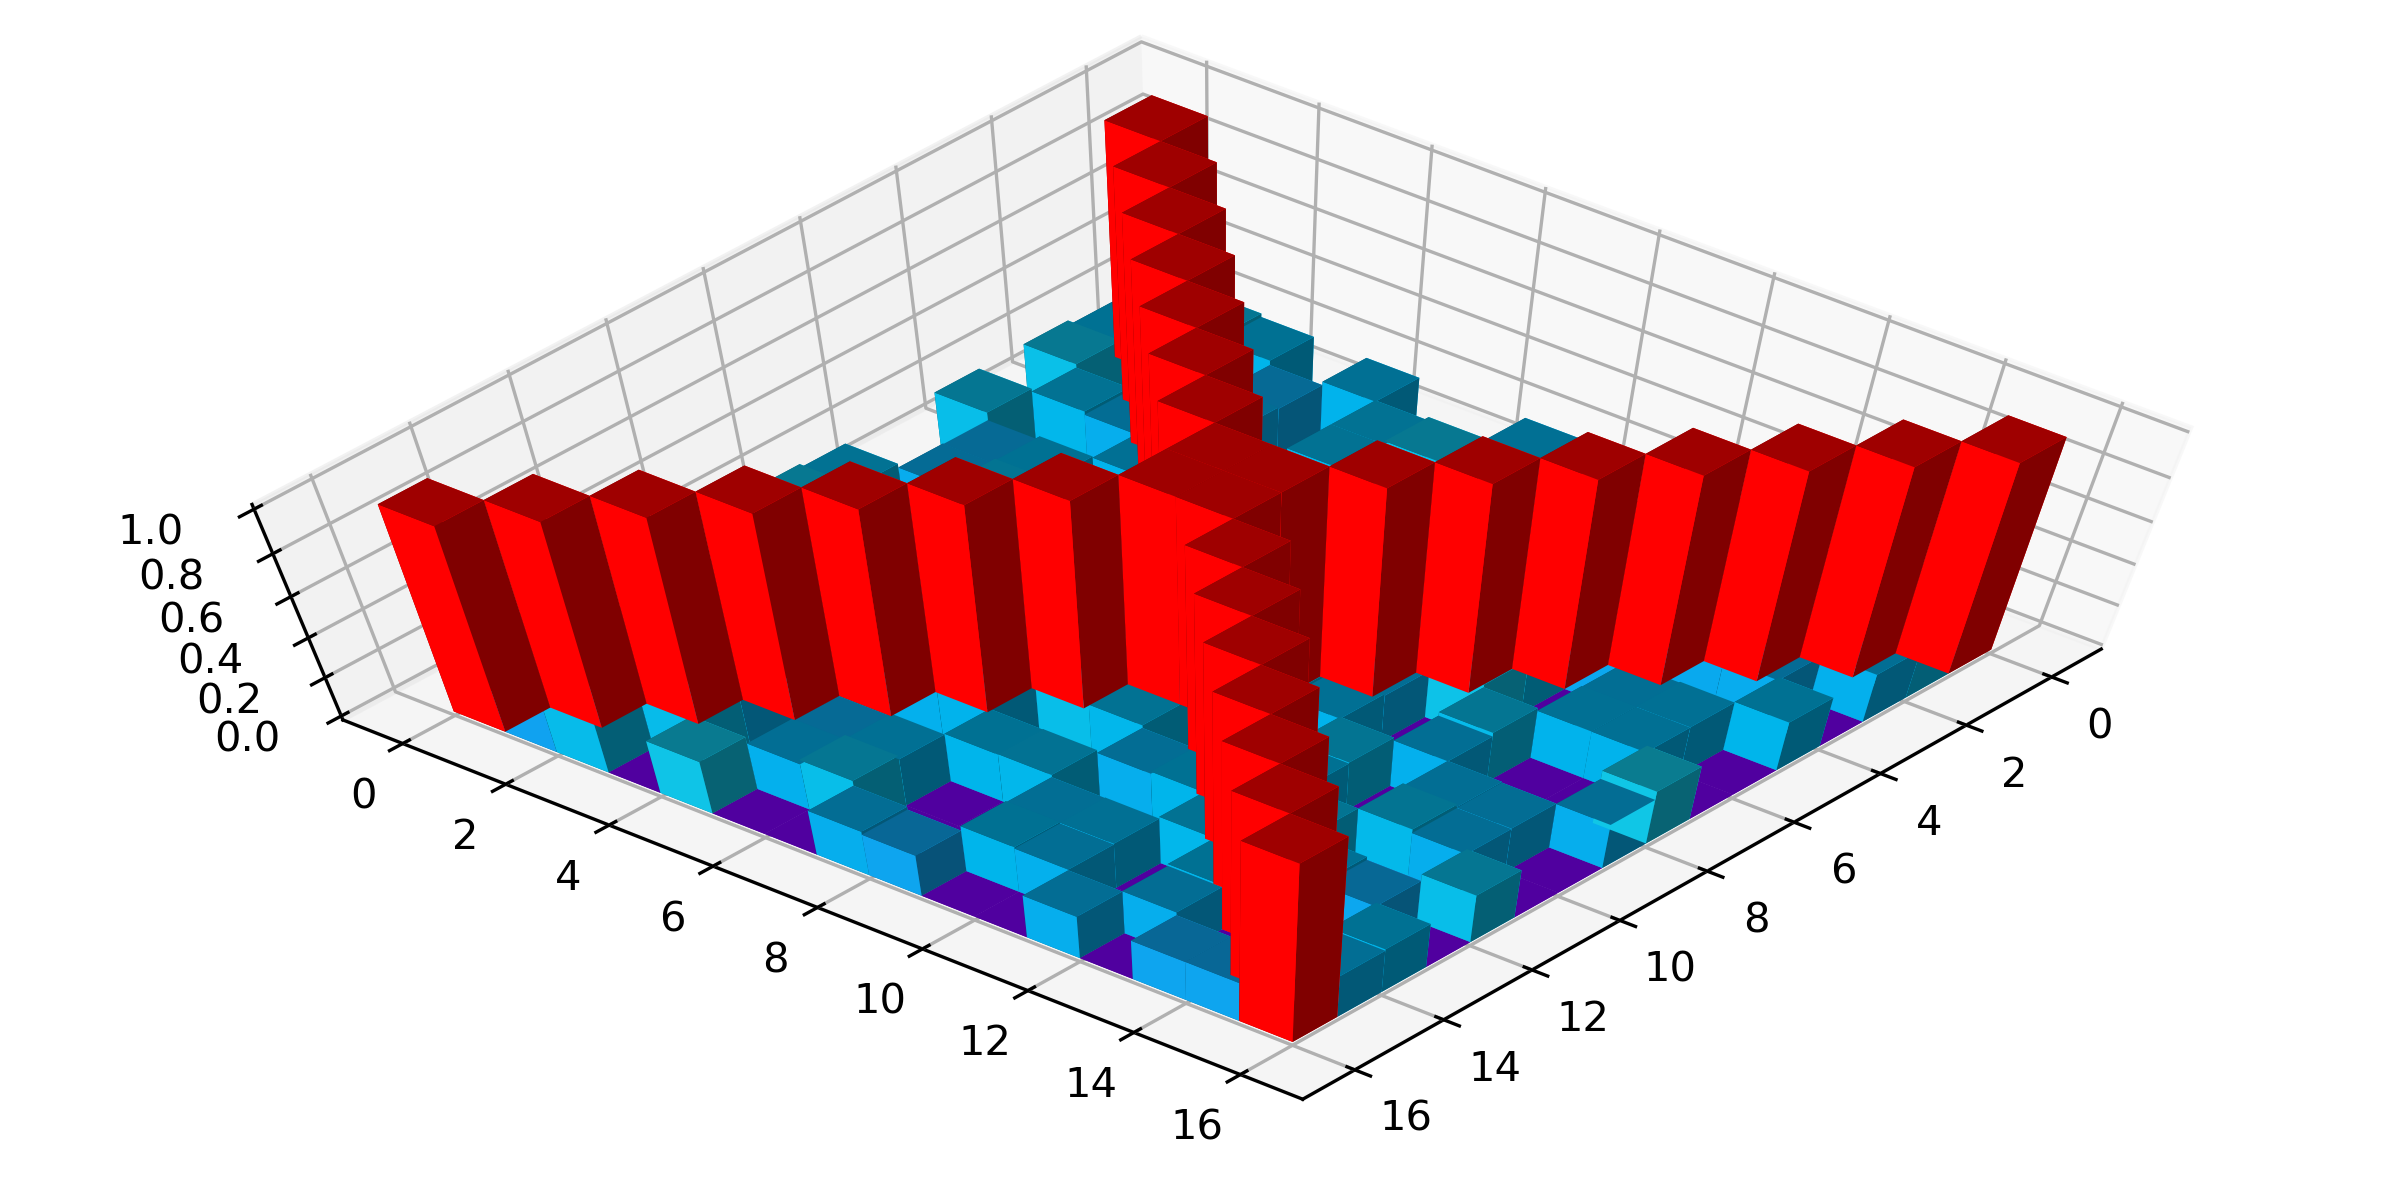

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import interactive
interactive(True)

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.cm as cm   



cmap = cm.get_cmap('rainbow')
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z] 

# setup the figure and axes
fig = plt.figure(figsize=(10, 5),dpi=300)
ax1 = fig.add_subplot(111, projection='3d')

bottom = np.zeros_like(z)
width = depth = 1

ax1.view_init(azim=40,elev=70)
ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)

